In [72]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
from scipy.stats import gaussian_kde
import pandas as pd
pylab.rcParams['figure.figsize'] = (16., 9.)
%matplotlib inline

In [74]:
df = pd.read_pickle('/users/global/cornkle/C_paper/MCS_blobs/df_MCS.pkl')

In [75]:
df.head()

,area_tab,hod,lat,lon,mon,p98,p_nb_conv,p_nb_gt30,p_nb_nz,p_znb,p_znb_conv,pmax,pmean,tmean,tmean_tab,tmin,yr
0,74252,3,12.7,-16.0,6,16.810,103,16,1380,1380,110,59.4,2.860290,-55.335507,-50.47,-78,2004
1,236835,1,10.3,-13.1,6,30.080,31,4,161,161,92,37.3,6.214286,-56.714286,-66.48,-69,2004
2,321286,0,12.0,-9.4,6,12.642,6,0,680,680,275,24.5,2.441765,-3.725000,-60.08,-39,2004
3,58938,0,10.2,21.7,6,12.642,6,0,680,680,275,24.5,2.441765,-3.725000,-59.81,-39,2004
4,29961,0,10.1,18.0,6,12.642,6,0,680,680,275,24.5,2.441765,-3.725000,-58.80,-39,2004


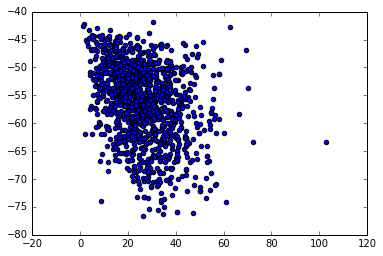

In [90]:
p = df.p98[(df.tmean<-40)]
t = df.tmean[(df.tmean<-40)]
plt.scatter(p,t)

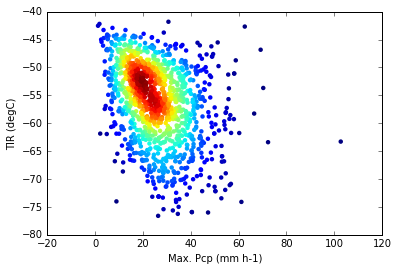

In [91]:
# Calculate the point density
xy = np.vstack([p,t])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(p, t, c=z, edgecolor='', )

plt.xlabel('Max. Pcp (mm h-1)')
plt.ylabel('TIR (degC)')

In [68]:
print('-40', (np.mean(df.p_nb_conv[(df.tmean_tab<-40)]/df.p_nb_nz[(df.tmean_tab<-40)]))*100.)
print('-70', (np.mean(df.p_nb_conv[(df.tmean_tab<-70)]/df.p_nb_nz[(df.tmean_tab<-70)]))*100.)

-40 11.474195063198822
-70 10.107876627167585


In [47]:
dfg = pd.read_pickle('/users/global/cornkle/C_paper/MCS_blobs/df_allPT_inMCS.pkl')

In [48]:
dfg.head()

,all_p_nz,all_t_nz
0,1.5,-40
1,3.2,-41
2,1.0,-40
3,11.3,-40
4,7.9,-40


In [49]:
np.percentile(dfg.all_p_nz, 98)

28.699999999999999

In [70]:
np.where(dfg.all_p_nz == 0)

(array([], dtype=int64),)

In [71]:
df.head()

,area_tab,hod,lat,lon,mon,p98,p_nb_conv,p_nb_gt30,p_nb_nz,pmax,pmean,tmean,tmean_tab,tmin,yr
0,108706,10,12.7,-8.5,6,22.624,133,10,737,52.8,3.509905,-42.519674,-48.21,-48,2004
1,191386,21,10.8,7.4,6,23.124,404,28,2948,70.4,3.878460,-59.585821,-60.38,-82,2004
2,302712,22,11.7,-11.3,6,47.156,501,92,1912,111.3,6.476046,-62.786611,-59.76,-81,2004
3,163243,6,11.3,-1.2,6,19.300,311,15,2287,65.4,4.398819,-55.781373,-56.81,-81,2004
4,119379,2,12.3,9.1,6,8.256,3,0,923,29.8,2.678332,-53.302275,-60.85,-64,2004


In [ ]:
df.